In [378]:
%reload_ext autoreload
%autoreload 2
from rls_master import *
import matplotlib.pyplot as plt
from time import time

# Data Generation

In [379]:
# Data generation
Nx = 1000
N = 1000
a,(X,Y) = data_gen(N,snr=10)
xaxis = 1/Nx*np.arange(Nx)
print('Groundtruth:',a)

Groundtruth: 0.24718795926253523


Text(0.5, 1.0, 'Scatter Plot')

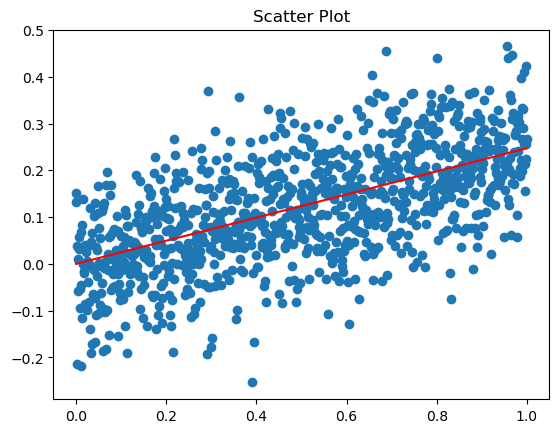

In [380]:
# Plot the data points
plt.scatter(X,Y)
plt.plot(xaxis,a*xaxis,'r')
plt.title('Scatter Plot')

# Fit LMS

LMS: 0.502455495157923
Time: 1.0080337524414062 ms


Text(0.5, 1.0, 'Scatter Plot')

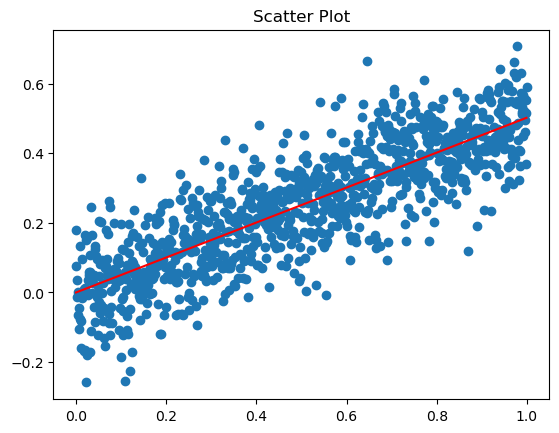

In [365]:
# Perform LMS fit

ti = time()
a_pred = LMS_fit(X,Y)
tf = time()

print('LMS:',a_pred)
print('Time:',1000*(tf-ti),'ms')
# Fit the data again
plt.scatter(X,Y)
plt.plot(xaxis,a_pred*xaxis,'r')
plt.title('Scatter Plot')

# Fit WLS

In [366]:
# Perform WLS fit
lambd = 0.9

ti = time()
a_hist = WLS(X,Y,lambd)
tf = time()

# Fit the data again
#plt.scatter(X,Y)
#plt.plot(xaxis,a_pred*xaxis,'r')
#plt.title('Scatter Plot')

WLS: 0.4990365743275316
Time: 731.1069965362549 ms


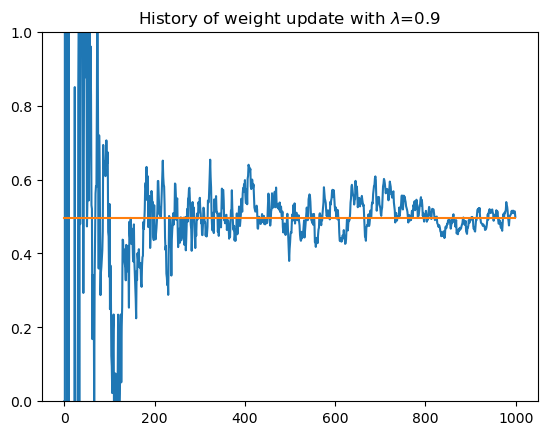

In [367]:
plt.plot(a_hist)
plt.plot(len(a_hist)*[a])
plt.ylim([0,1])
plt.title(f'History of weight update with $\lambda$={lambd}')
print('WLS:',a_hist[-1])
print('Time:',1000*(tf-ti),'ms')

# Fit RLS

In [376]:
# Perform RLS
ti = time()
a_hist = RLS(X,Y,lambd,delta=1)
tf = time()



RMS: 0.5037945946062066
Time: 1.6629695892333984 ms


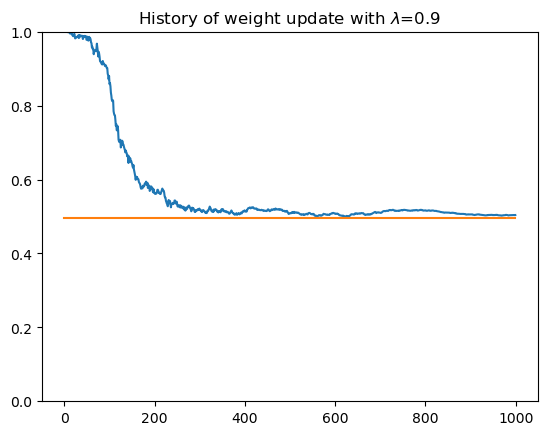

In [377]:
plt.plot(a_hist)
plt.plot(len(a_hist)*[a])
plt.ylim([0,1])



plt.title(f'History of weight update with $\lambda$={lambd}')
print('RMS:',a_hist[-1])
print('Time:',1000*(tf-ti),'ms')